In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
data_path = '/Users/christianfullerton/Desktop/Coding Workspace/Python Workspace/Data Science Practice/Cigarette and Drinking Data/Updated Cigarette & Drinking Data.csv'

In [3]:
df = pd.read_csv(data_path)
df = df.drop(columns=['id', 'name','city'])
df.columns

Index(['age', 'gender', 'country', 'education_level', 'employment_status',
       'annual_income_usd', 'marital_status', 'children_count',
       'smokes_per_day', 'drinks_per_week', 'age_started_smoking',
       'age_started_drinking', 'attempts_to_quit_smoking',
       'attempts_to_quit_drinking', 'has_health_issues',
       'mental_health_status', 'exercise_frequency', 'diet_quality',
       'sleep_hours', 'bmi', 'social_support', 'therapy_history',
       'salary_percentile', 'age_group', 'adequet_sleep', 'family_status'],
      dtype='object')

In [4]:
le = LabelEncoder()

In [5]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [6]:
X = df.drop(columns=['therapy_history'])
y = df['therapy_history']

In [7]:
y = le.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier(n_estimators = 500,
                               criterion = 'gini',
                               max_depth = 5,
                               min_samples_leaf = 3,
                               random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=500,
                       random_state=42)

In [18]:
y_pred = model.predict(X_test)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

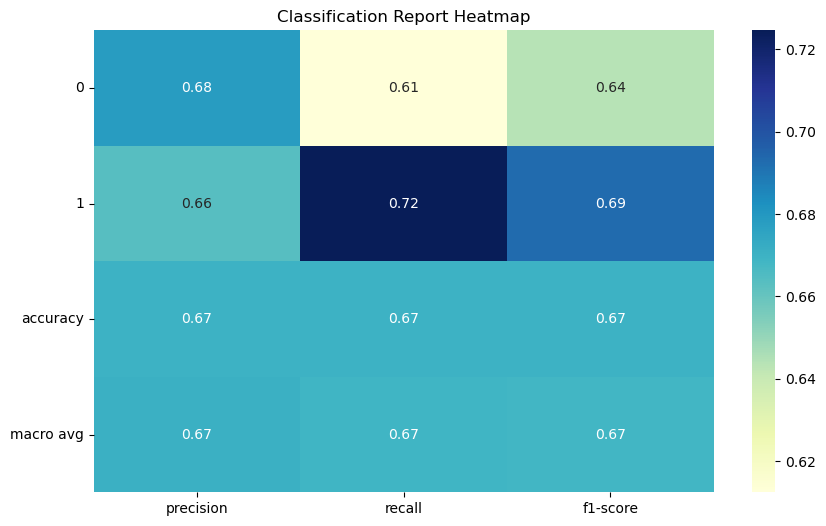

In [19]:
# Heatmap for classification metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.yticks(rotation=0)
plt.show()

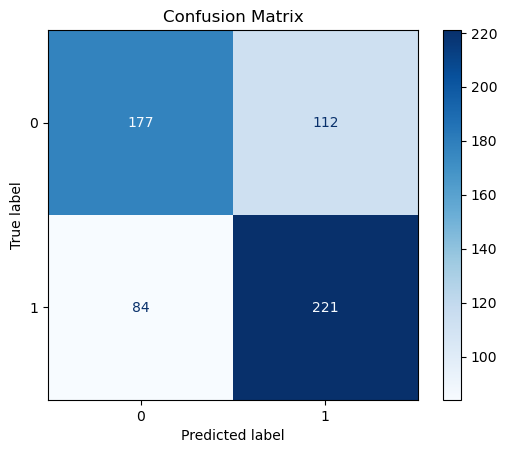

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()